
- [Python mplfinance Plot yfinance Candle Chart, Moving Average, MACD and Volume (Multi Panel)](https://code.luasoftware.com/tutorials/algo-trading/python-mplfinance-plot-yfinance-candle-chart-moving-average-macd-and-volume/)

- [mplfinance — plotting financial data](https://towardsdatascience.com/mplfinance-matplolibs-relatively-unknown-library-for-plotting-financial-data-62c1c23177fd)
    
- [Stock Market Data Visualization Using Mplfinance](https://medium.com/mlearning-ai/stock-market-data-visualization-using-mplfinance-1d35a8d48e4#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6ImQ2M2RiZTczYWFkODhjODU0ZGUwZDhkNmMwMTRjMzZkYzI1YzQyOTIiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NDcxMzcyMTMsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjEwMzgwMTUyNzUxMjY3NzAyMjMyNCIsImVtYWlsIjoid2VuLmcuZ29uZ0BnbWFpbC5jb20iLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwiYXpwIjoiMjE2Mjk2MDM1ODM0LWsxazZxZTA2MHMydHAyYTJqYW00bGpkY21zMDBzdHRnLmFwcHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwibmFtZSI6IlcgR29uZyIsInBpY3R1cmUiOiJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vYS0vQU9oMTRHaEZqLU90M2tnQVZLQWpOQkVrVVFYbVhacVdRRFVPTkU3TWlDTmpmUT1zOTYtYyIsImdpdmVuX25hbWUiOiJXIiwiZmFtaWx5X25hbWUiOiJHb25nIiwiaWF0IjoxNjQ3MTM3NTEzLCJleHAiOjE2NDcxNDExMTMsImp0aSI6IjU4OGY4MWJkNDk5ZjJiNzhkZGQ0ZDA0NjhjZTY0MmY2NmY3MjhlNWQifQ.Br1skeC1qHudywRwl4sJvjiC_kzBFPaITJVEjWpprBrV9ZSeCXYARiPb98VONFS77m3pGi3ZcDOgkva3GYU-TusoedJxx8Gz0noA6n0zHYOpBChg8He-66F9hsyAZ_nHWqNlnwRyHWA6ALq_LOVLoeu7GTeq56a5DD_sI0kbbrdJmhTcRzL1Kka33wwA533c7RhIxS8UbnabflIZiuA9MOcLWMcaRgjS93kExOCHeF4G-01_wjRjhFk-Ujz_p9t93fFUjuOT_WlosWrIkA8l3KEB-PKo4Mdlqr62cLiiBY_au1M0ICpEXLywbACT5i3ZnuW8DTJFcQ3BD6ubD7cDzA)

- [How to save mplfinance plot](https://github.com/matplotlib/mplfinance/blob/master/examples/savefig.ipynb)

```
pip install TA-Lib mplfinance yfinance
```

In [1]:
import os.path
import pickle

import yfinance as yf
import mplfinance as mpf
import talib as ta

import IPython.display as IPydisplay

In [2]:
NUM_OF_DAYS_QUOTE = 400
FILE_CACHE_QUOTES = os.path.expanduser("~/df_quotes_cache.pickle")

In [3]:
def download_quote(symbol, num_days=NUM_OF_DAYS_QUOTE):
    return yf.Ticker(symbol).history(f"{num_days}d")

def get_quotes(symbol, num_days=NUM_OF_DAYS_QUOTE, cache=False):
    """
    check cache:
        import pickle
        data = pickle.load(open("df_quotes_cache.pickle", "rb"))
        data.keys()
    """
    if not cache:
        return download_quote(symbol, num_days=num_days)
        
    if os.path.exists(FILE_CACHE_QUOTES):
        quote_data = pickle.load(open(FILE_CACHE_QUOTES, "rb"))
        if symbol in quote_data and num_days == quote_data[symbol]["num_days"]:
            df = quote_data[symbol]["df"]
        else:
            df = download_quote(symbol, num_days=num_days)
            quote_data[symbol] = dict(num_days=num_days, df=df)
            pickle.dump(quote_data, open(FILE_CACHE_QUOTES, "wb"))
    else:
        df = download_quote(symbol, num_days=num_days)
        quote_data = {}
        quote_data[symbol] = dict(num_days=num_days, df=df)
        pickle.dump(quote_data, open(FILE_CACHE_QUOTES, "wb"))

    return df


In [9]:
def _MACD(data, fastperiod=12, slowperiod=26, signalperiod=9):
    ema_fast = data["Close"].ewm(span=fastperiod).mean()
    ema_slow = data["Close"].ewm(span=slowperiod).mean()
    data["macd"] = ema_fast - ema_slow
    data["macd_signal"] = data["macd"].ewm(span=signalperiod).mean()
    data["macd_hist"] = data["macd"] - data["macd_signal"]
    return data

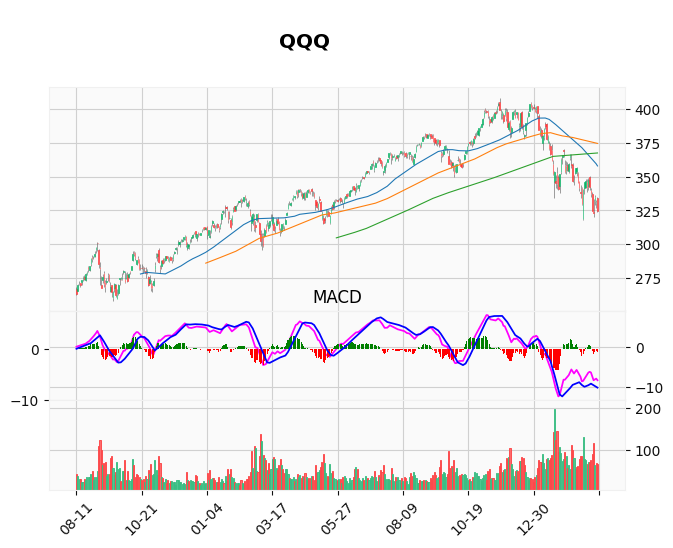

In [10]:
ticker_name = "QQQ"
data = get_quotes(ticker_name, cache=True)

# trim volume to avoid exponential form
data['Volume'] = data['Volume'] / 1000000

# macd
# data["macd"], data["macd_signal"], data["macd_hist"] = ta.MACD(data['Close'])
data = _MACD(data)

# macd panel
colors = ['g' if v >= 0 else 'r' for v in data["macd_hist"]]
macd_plot = mpf.make_addplot(data["macd"], panel=1, color='fuchsia', title="MACD")
macd_hist_plot = mpf.make_addplot(data["macd_hist"], type='bar', panel=1, color=colors) # color='dimgray'
macd_signal_plot = mpf.make_addplot(data["macd_signal"], panel=1, color='b')

# plot
plots = [macd_plot, macd_signal_plot, macd_hist_plot]
mpf.plot(data, type='candle', style='yahoo', 
         mav=(50,100,200), addplot=plots, 
         title=f"\n{ticker_name}", volume=True, volume_panel=2, 
         ylabel='', ylabel_lower='',
         datetime_format='%m-%d'
    )

In [11]:
file_png = os.path.expanduser(os.path.join("~", f"{ticker_name}-1.png"))

In [12]:
mpf.plot(data, type='candle', style='yahoo', 
         mav=(50,100,200), addplot=plots, 
         title=f"{ticker_name}", volume=True, volume_panel=2, 
         ylabel='', ylabel_lower='',
         datetime_format='%m-%d',
         savefig=file_png
    )

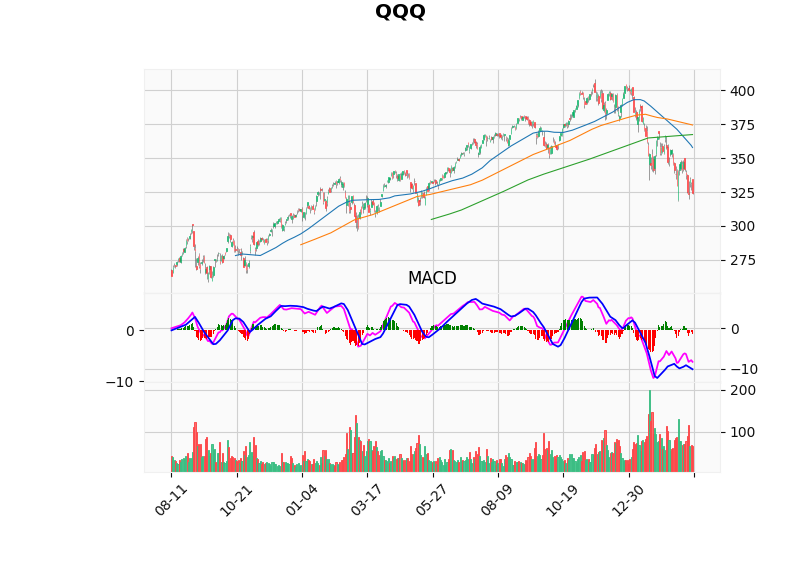

In [13]:
IPydisplay.Image(filename=file_png)